# How to Succeed at Speed Dating <br>Without Really Trying 

<img src="speed_dating_art.jpg" alt="Drawing" style="width: 400px; height:200px">

## Unit 3 Data Science Capstone <br> by Vincent Gomez


The assignment: 

First: Find a dataset of interest. 

Second: Explore the data set and find some interesting insights.

Third: Make prediction models for an outcome of interest.

I searched for quite a bit of time before finding a data set that interested me. 

It was a [data set about Speed Dating that I found on Kaggle](https://www.kaggle.com/annavictoria/speed-dating-experiment).

It was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar.


The data was gathered from participants in experimental speed dating events from 2002-2004. 

During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 

<img src="Four_Minute_Timer.png"alt="Drawing" style="width: 200px; float: right;">

At the end of their four minutes, participants were asked if they would like to see their date again (Montoya, A. 2015).


They were also asked to rate their date on six attributes:

Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. 

These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information (Montoya, A. 2015).

That sure does sound like a lot of stuff!!!

Let's take a peek at what our data set looks like...

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from matplotlib.gridspec import GridSpec
import textwrap

%matplotlib inline

In [2]:
speed_dating_download = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

In [3]:
speed_dating = speed_dating_download.copy()

In [4]:
speed_dating2 = speed_dating_download.copy()

In [5]:
speed_dating['gender'] = speed_dating['gender'].map({0:'Female', 1:'Male'})
speed_dating['length'] = speed_dating['length'].map({1:'Too Short', 2:'Too Long', 3:'Just Right'})
speed_dating['numdat_2'] = speed_dating['numdat_2'].map({1:'Too Few', 2:'Too Many', 3:'Just Enough'})
speed_dating['race'] = speed_dating['race'].map({1:'Black', 2:'White', 3:'Latino', 4:'Asian', 5:'Native American', 6:'Other'})
speed_dating['goal'] = speed_dating['goal'].map({1:'Seemed like a fun night out', 2:'To meet new people',
                                                3:'To get a date', 4:'Looking for a serious relationship',
                                                5:'To say I did it', 6:'Other'})
# speed_dating['date_3'] = speed_dating['date_3'].map({2:0})

In [6]:
data = speed_dating.groupby(['iid']).first()

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

speed_dating

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too Long,Too Few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too Long,Too Few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too Long,Too Few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN

This is definitely A LOT of data to go through.

Fortunately, we don't have to use all of it. We are allowed to just use the data that would suit the questions and curiosities we may have.

If we're lucky, the data available can support our specific interests and provide some useful insight. 

Often times though, it is the data that shapes the questions we're allowed to ask and the patterns that we're allowed to see. 


With the data availble, these were some of the questions that I was hoping to answer:

What is the most important attribute in getting that first date?

Is there a difference in what men and women find important in a partner?

How can I make myself more 'marketable' in the dating scene?

Let's first start by examining the population...

There were 551 participants.
274 women and 277 men.


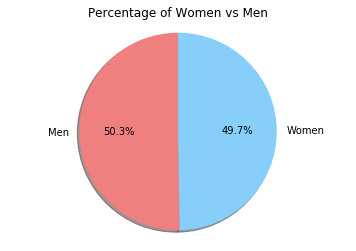

Each person met 10-20 potential matches. So there were 4184 speed dates.


In [8]:
women_data = speed_dating[speed_dating.gender == 'Female']
men_data = speed_dating[speed_dating.gender == 'Male']

print('There were {} participants.\n{} women and {} men.'.format(speed_dating.iid.nunique(),
                                                               women_data.iid.nunique(),
                                                               men_data.iid.nunique()))
# Data to plot
labels = 'Men', 'Women'
sizes = [men_data.iid.nunique() , women_data.iid.nunique()]
colors = ['lightcoral', 'lightskyblue']
explode = ( 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Women vs Men')
plt.axis('equal')
plt.show()

print('Each person met 10-20 potential matches. So there were {} speed dates.'.format(women_data.shape[0]))

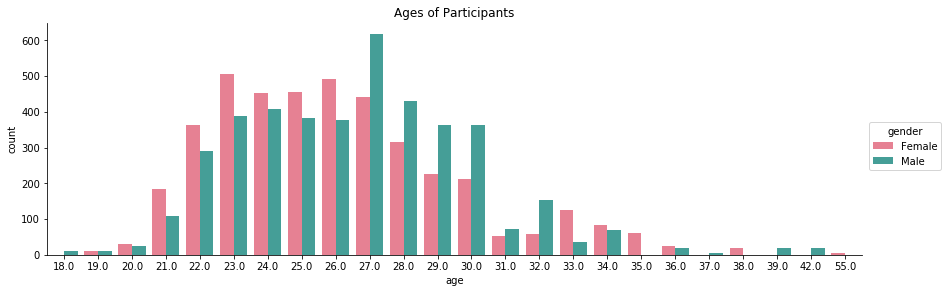

In [9]:
sns.factorplot(x="age", hue='gender', data=speed_dating, 
               kind='count',size=4, aspect=3, palette="husl")
plt.title('Ages of Participants')
plt.show()

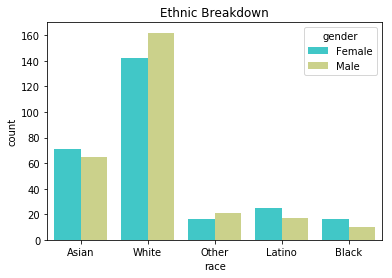

In [10]:
sns.countplot(x="race", data=data, hue='gender', palette="rainbow")
plt.title('Ethnic Breakdown')
plt.show()


There were over 200 different majors. These were the top 20 most popular ones...


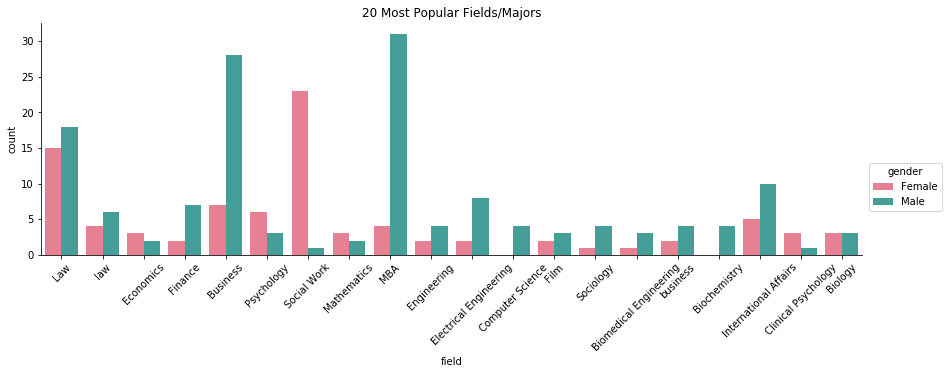

In [11]:
print("There were over 200 different majors. These were the top 20 most popular ones...")

top_10_fields = data.field.value_counts().head(n=20)

top_10_fields = data.loc[data.field.isin(list(top_10_fields.index)), :]

g = sns.factorplot(x="field", hue='gender', data=top_10_fields, 
               kind='count',size=4, aspect=3, palette="husl")
g.set_xticklabels(rotation=45)
plt.title('20 Most Popular Fields/Majors')
plt.show()


Now, let's look at how the participants felt about participating in the event...

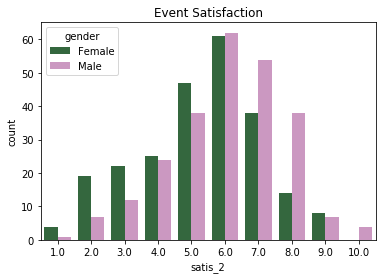

In [12]:
sns.countplot(x="satis_2", hue='gender', palette="cubehelix", data=data)
plt.title('Event Satisfaction')
plt.show()


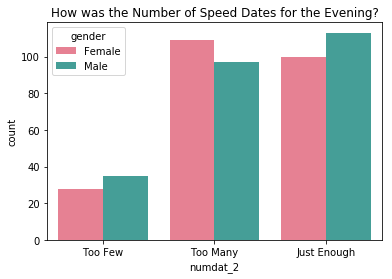

In [13]:
sns.countplot(x="numdat_2", data=data, hue='gender', palette="husl")
plt.title('How was the Number of Speed Dates for the Evening?')
plt.show()

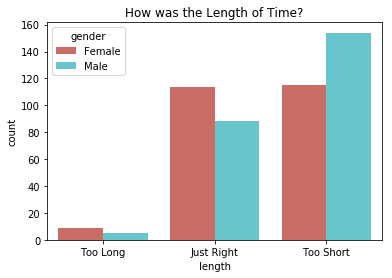

In [14]:
sns.countplot(x="length", hue='gender', data=data, palette="hls")
plt.title('How was the Length of Time?')
plt.show()

Participants were asked to rate the importance of 6 main attributes: 

Attraction, Sincerety, Ambition, Intelligence, Fun, and Shared Interests. 

On the day of the event, these are the results:


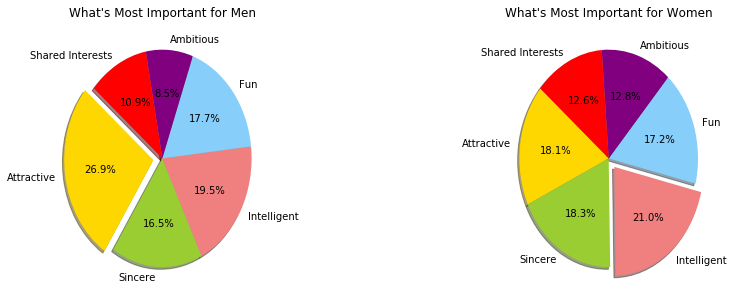

In [15]:
print('On the day of the event, these are the results:')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

attr_sum = men_data.attr1_1.sum()
sinc_sum = men_data.sinc1_1.sum()
intell_sum = men_data.intel1_1.sum()
fun_sum = men_data.fun1_1.sum()
amb_sum = men_data.amb1_1.sum()
shar_sum = men_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('What\'s Most Important for Men')
 
# plt.axis('equal')

attr_sum = women_data.attr1_1.sum()
sinc_sum = women_data.sinc1_1.sum()
intell_sum = women_data.intel1_1.sum()
fun_sum = women_data.fun1_1.sum()
amb_sum = women_data.amb1_1.sum()
shar_sum = women_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0, 0, 0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
ax2.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('What\'s Most Important for Women')
 
# plt.axis('equal')
fig.subplots_adjust(wspace=1)
plt.show()

When asked in the days following the event, however, there were a few changes...


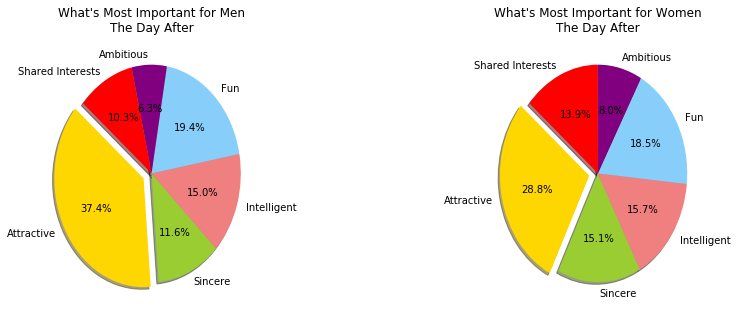

In [16]:
print('When asked in the days following the event, however, there were a few changes...')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

attr_sum = men_data.attr7_2.sum()
sinc_sum = men_data.sinc7_2.sum()
intell_sum = men_data.intel7_2.sum()
fun_sum = men_data.fun7_2.sum()
amb_sum = men_data.amb7_2.sum()
shar_sum = men_data.shar7_2.sum()


# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('What\'s Most Important for Men\nThe Day After')
 
# plt.axis('equal')

attr_sum = women_data.attr7_2.sum()
sinc_sum = women_data.sinc7_2.sum()
intell_sum = women_data.intel7_2.sum()
fun_sum = women_data.fun7_2.sum()
amb_sum = women_data.amb7_2.sum()
shar_sum = women_data.shar7_2.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax2.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('What\'s Most Important for Women\nThe Day After')
 
# plt.axis('equal')
fig.subplots_adjust(wspace=1)
plt.show()

Here is how the men and women scored each other on these 6 attributes...


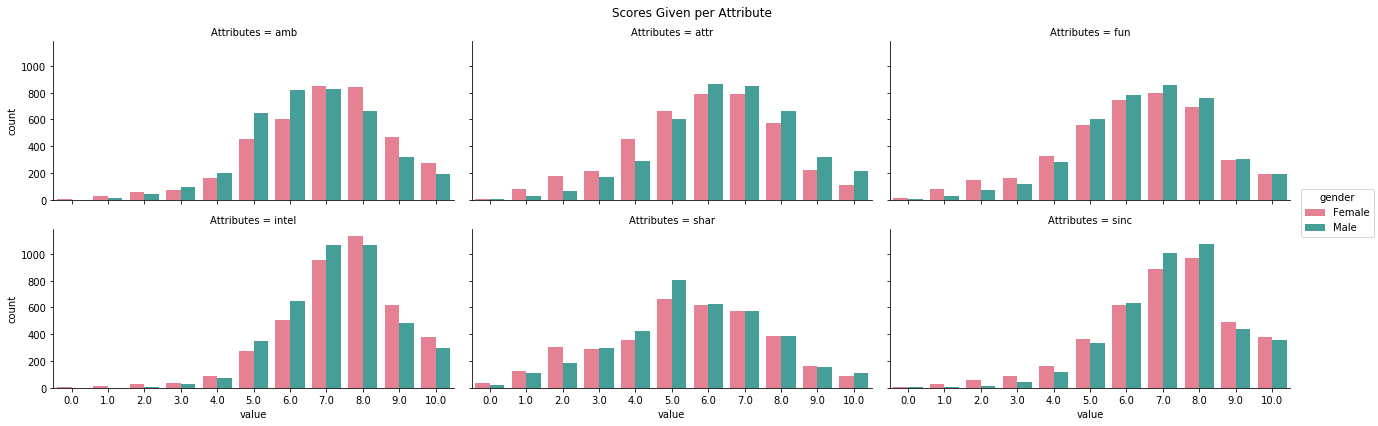

In [17]:
print('Here is how the men and women scored each other on these 6 attributes...')

experiment = speed_dating.loc[:,['iid','pid','gender', 'attr','amb','sinc','intel','fun','shar']]
experiment2 = pd.pivot_table(experiment,index=["iid",'gender', "pid"])
experiment2_stacked = experiment2.stack()
experiment2_stacked.index.set_names('Attributes', level=len(experiment2_stacked.index.names)-1, inplace=True)
experiment2_stacked = experiment2_stacked.reset_index().rename(columns={0:'value'})
experiment2_stacked = experiment2_stacked[experiment2_stacked['value']%1 == 0]
g = sns.factorplot(x="value", hue="gender", col="Attributes",
                   data=experiment2_stacked, kind="count",
                   size=3, aspect=2, col_wrap=3, palette='husl')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scores Given per Attribute')
plt.show()

And here is how they scored themselves...


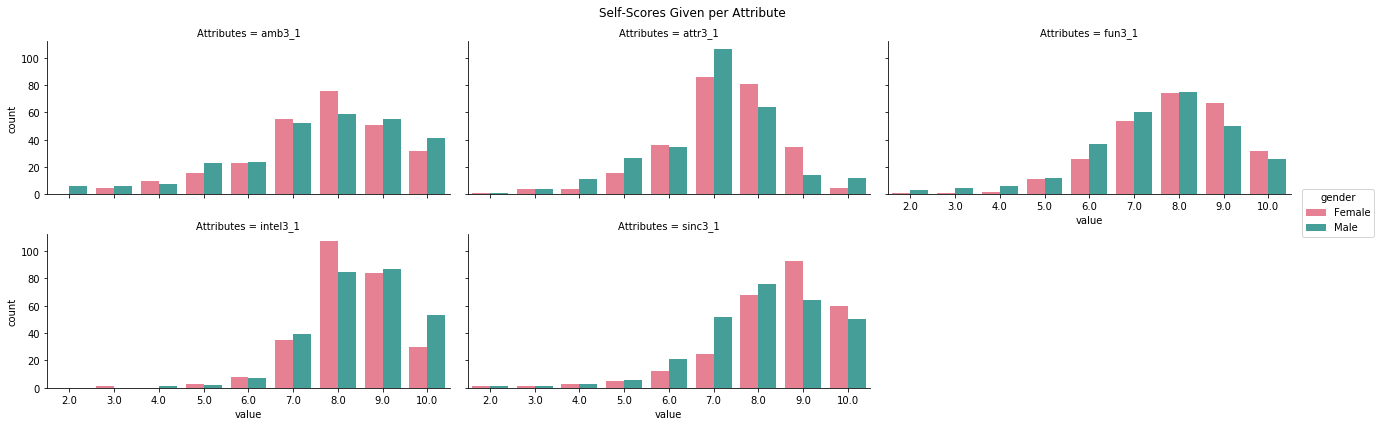

In [18]:
print('And here is how they scored themselves...')

experiment = speed_dating.loc[:,['iid','pid','gender', 'attr3_1',
                                 'amb3_1','sinc3_1','intel3_1',
                                 'fun3_1']]
experiment = experiment.groupby(['iid']).first()
experiment2 = pd.pivot_table(experiment,index=["iid",'gender', "pid"])
experiment2_stacked = experiment2.stack()
experiment2_stacked.index.set_names('Attributes', level=len(experiment2_stacked.index.names)-1, inplace=True)
experiment2_stacked = experiment2_stacked.reset_index().rename(columns={0:'value'})
experiment2_stacked = experiment2_stacked[experiment2_stacked['value']%1 == 0]
g = sns.factorplot(x="value", hue="gender", col="Attributes",
                   data=experiment2_stacked, kind="count",
                   size=3, aspect=2, col_wrap=3, palette='husl')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Self-Scores Given per Attribute')
plt.show()

In [19]:
self_scores = data.loc[:,['gender', 'attr3_1',
                                 'amb3_1','sinc3_1','intel3_1',
                                 'fun3_1']]
self_scores.columns = ['gender', 'attr','amb','sinc','intel','fun']
self_scores_pivot = pd.pivot_table(self_scores,index=["iid",'gender'])
self_scores_stacked = self_scores_pivot.stack()
self_scores_stacked.index.set_names('Attributes', level=len(self_scores_stacked.index.names)-1, inplace=True)
self_scores_stacked = self_scores_stacked.reset_index().rename(columns={0:'Self_Scores'})
self_scores_stacked.head()

,iid,gender,Attributes,Self_Scores
0,1,Female,amb,7.0
1,1,Female,attr,6.0
2,1,Female,fun,8.0
3,1,Female,intel,8.0
4,1,Female,sinc,8.0


In [20]:
score_averages = speed_dating.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'dec','gender'].mean()
score_averages_pivot = pd.pivot_table(score_averages,index=["pid",'dec'])
score_averages_stacked = score_averages_pivot.stack()
score_averages_stacked.index.set_names('Attributes', level=len(score_averages_stacked.index.names)-1, inplace=True)
score_averages_stacked = score_averages_stacked.reset_index().rename(columns={0:'Given_Scores'})
score_averages_stacked.columns = ['iid', 'dec','Attributes','Given_Scores']
score_averages_stacked.head()

,iid,dec,Attributes,Given_Scores
0,1.0,0.5,amb,8.0
1,1.0,0.5,attr,6.7
2,1.0,0.5,fun,7.2
3,1.0,0.5,intel,8.0
4,1.0,0.5,sinc,7.4


In [21]:
self_and_given_scores = pd.merge(self_scores_stacked, score_averages_stacked, how='inner', on=['iid','Attributes'], left_on=None, right_on=None,
         left_index=True, right_index=True)
self_and_given_scores.head()

,iid,gender,Attributes,Self_Scores,dec,Given_Scores
0,1,Female,amb,7.0,0.5,8.0
1,1,Female,attr,6.0,0.5,6.7
2,1,Female,fun,8.0,0.5,7.2
3,1,Female,intel,8.0,0.5,8.0
4,1,Female,sinc,8.0,0.5,7.4


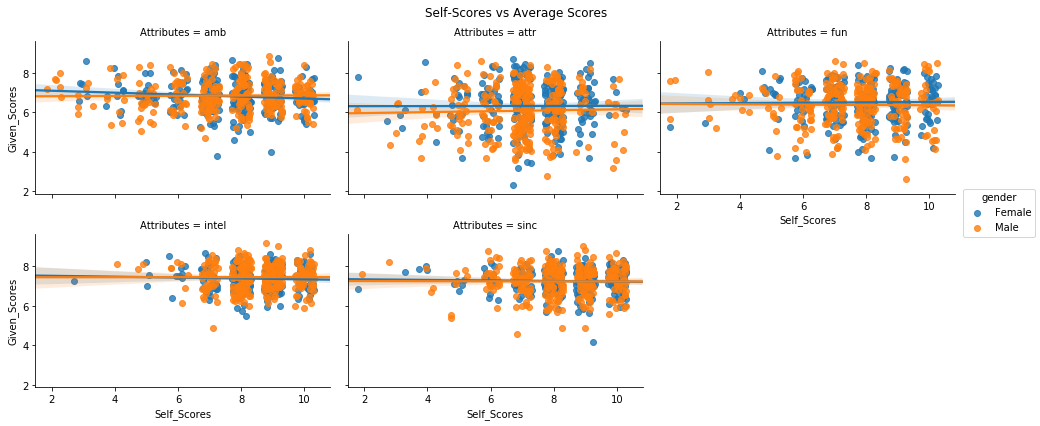

In [22]:
g = sns.lmplot(x="Self_Scores", y="Given_Scores", data=self_and_given_scores, hue='gender',
           col='Attributes',col_wrap=3, x_jitter=.3, size=3, aspect=1.5)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Self-Scores vs Average Scores')
plt.show()

And now, for some some outcomes...

Here are the raw numbers of YES's and NO's given...


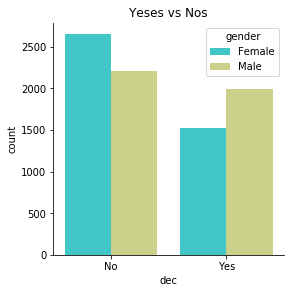

In [23]:
print('Here are the raw numbers of YES\'s and NO\'s given...')

g = sns.factorplot(x="dec", hue='gender', data=speed_dating, 
               kind='count', palette="rainbow", legend_out = False)

plt.title('Yeses vs Nos')

g.set_xticklabels(['No','Yes'])

plt.show()

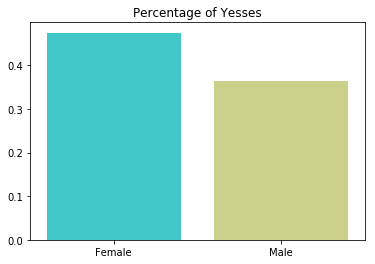

Women had a 47.5% chance of getting a yes while men had a 36.5% chance.


In [24]:
men_percent = speed_dating.loc[(speed_dating.gender == 'Male'), :].dec_o.mean()
women_percent = speed_dating.loc[(speed_dating.gender == 'Female') , :].dec_o.mean()

gender_yes_averages = [women_percent, men_percent]
genders = ['Female','Male']

sns.barplot(x=genders, y=gender_yes_averages, palette = 'rainbow')

plt.title('Percentage of Yesses')

plt.show()

print('Women had a {:.1%} chance of getting a yes while men had a {:.1%} chance.'.format(women_percent, men_percent))


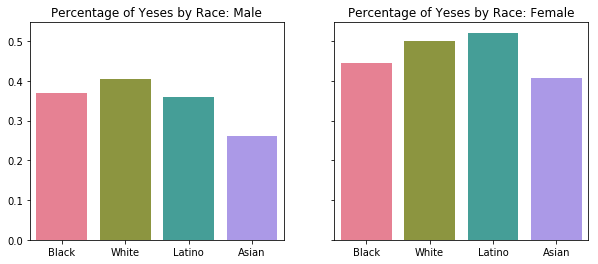

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4), sharey=True)

races = ['Black', 'White', 'Latino', 'Asian']
ethnicity_yes_average = []
for race in races:
    ethnicity_yes_average.append(speed_dating.loc[((speed_dating.gender == 'Male') & (speed_dating.race == race)), :].dec_o.mean())

sns.barplot(x=races, y=ethnicity_yes_average, ax=ax1, palette='husl')
ax1.set_title('Percentage of Yeses by Race: Male')

races = ['Black', 'White', 'Latino', 'Asian']
ethnicity_yes_average = []
for race in races:
    ethnicity_yes_average.append(speed_dating.loc[((speed_dating.gender == 'Female') & (speed_dating.race == race)), :].dec_o.mean())

sns.barplot(x=races, y=ethnicity_yes_average, ax=ax2, palette='husl')
ax2.set_title('Percentage of Yeses by Race: Female')
plt.show()

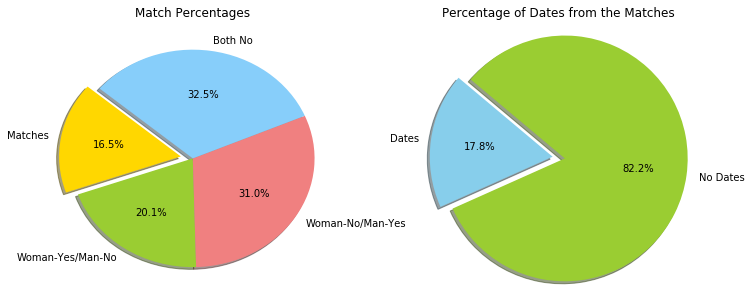

In [26]:
total = women_data.shape[0]
matches = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 1)),:].shape[0]

womanY_manN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 1)),:].shape[0]

womanN_manY = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 0)),:].shape[0]

bothN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 0)),:].shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
# Data to plot
labels = 'Matches', 'Woman-Yes/Man-No', 'Woman-No/Man-Yes', 'Both No'
sizes = [matches, womanY_manN, womanN_manY, bothN]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

ax1.set_title('Match Percentages')
plt.axis('equal')

ax2.pie([17.8,82.2],  explode=[0.1,0], labels=['Dates', 'No Dates'], colors=['skyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax2.set_title('Percentage of Dates from the Matches')
plt.axis('equal')

# fig.subplots_adjust(wspace=1)

plt.show()

Only 3% of the speed dates resulted in actual dates!


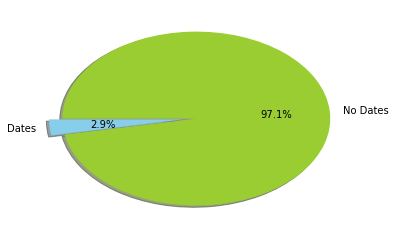

In [27]:
print("Only 3% of the speed dates resulted in actual dates!")

plt.pie([0.02937,0.97063],  explode=[0.1,0], labels=['Dates', 'No Dates'], colors=['skyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.show()

Creating Predictive Models

Selecting Features

My features:

The 6 attribute scores: Attraction, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The overall 'like' score.

The 'prob' score.

In [28]:
speed_dating1 = speed_dating[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob' ]].dropna()

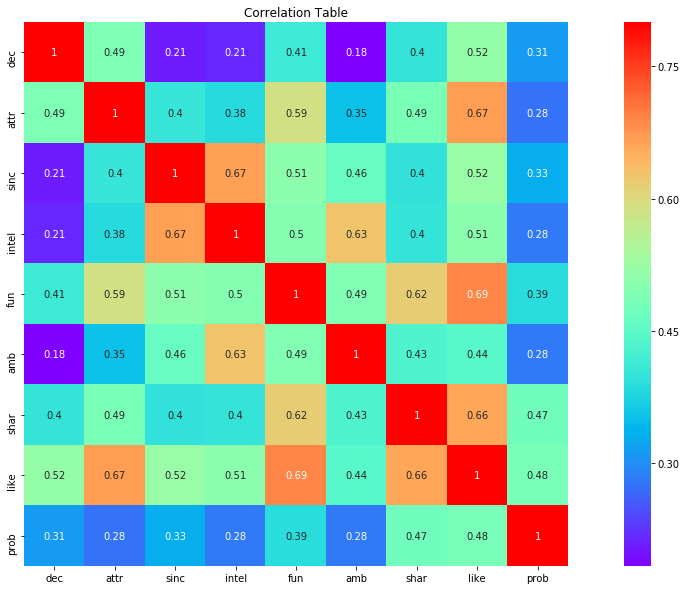

In [29]:
speed_dating1_rankings = speed_dating1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(speed_dating1_rankings, vmax=.8, square=True, annot=True, cmap = 'rainbow')
plt.title('Correlation Table')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split # to split the data into two parts

#now split our data into train and test
train, test = train_test_split(speed_dating1, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension

print('With the above code, I broke the data into two groups...')
print('The train group has {} rows.'.format(train.shape[0]))
print('The test group has {} rows.'.format(test.shape[0]))
print('I will use the train group to train the data and the test group to test it!')

With the above code, I broke the data into two groups...
The train group has 4874 rows.
The test group has 2089 rows.
I will use the train group to train the data and the test group to test it!


Decision Tree


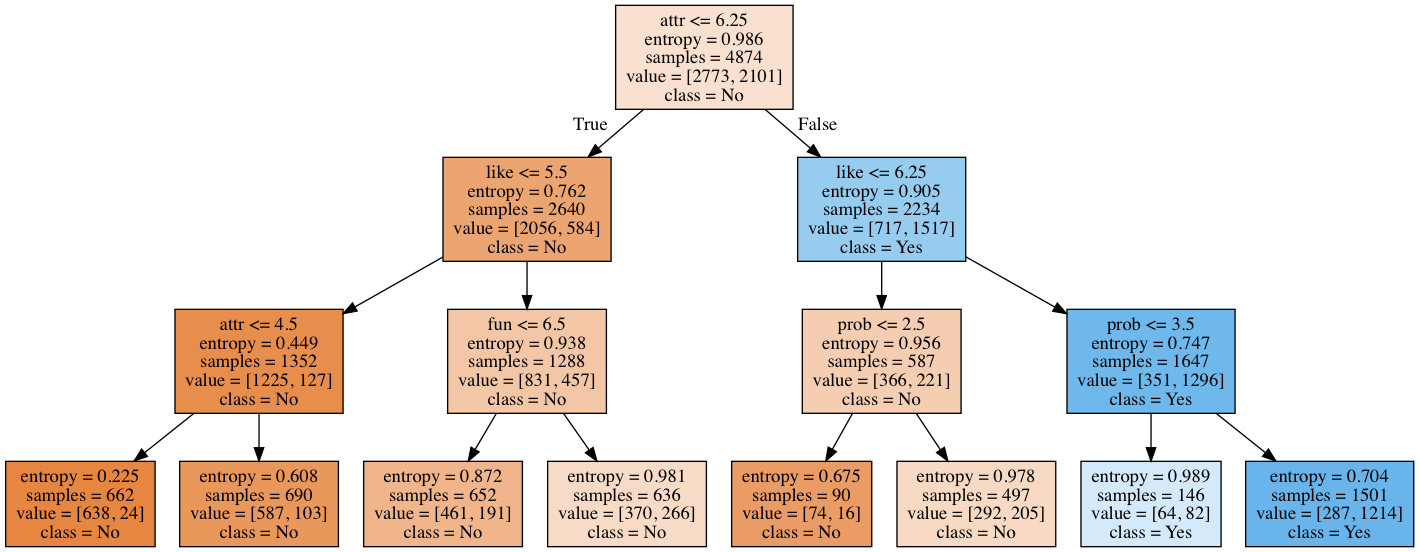

In [31]:
print('Decision Tree')

from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']] # taking test data inputs
test_y = test.dec   #output value of test data
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=3,
)
decision_tree.fit(train_X,train_y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We can now use the tree to make some predictions for us...

In [32]:
# ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

decision_tree.predict(np.asarray([9, 3, 2, 0, 2, 3, 7, 0]).reshape(1, -1))

array([1])

Using the test group, I can see how well my model works...
My model accuracy is 74.0%


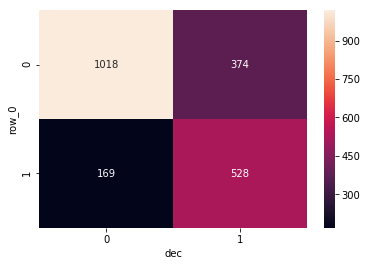

In [33]:
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix


prediction = decision_tree.predict(test_X)
print('Using the test group, I can see how well my model works...')
print('My model accuracy is {:.1%}'.format(metrics.accuracy_score(prediction,test_y)))


sns.heatmap(pd.crosstab(prediction,test_y), annot=True, fmt="d")
plt.show()

In [34]:
print('It is a good idea to run decision trees several times with different combinations of the data to avoid what is known as \'overfitting\'. Using a library, I shuffled the data 5 different ways and got the following results...\n')

from sklearn.model_selection import KFold

X = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob' ]].as_matrix()
y = speed_dating1.dec.as_matrix()

kf = KFold(n_splits=5, random_state=None, shuffle=True)
sum_of_scores = 0
for train_index, test_index in kf.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
    decision_tree.fit(train_X,train_y)
    prediction = decision_tree.predict(test_X)
    print(metrics.accuracy_score(prediction,test_y))
    sum_of_scores += metrics.accuracy_score(prediction,test_y)

print("\nMean Accuracy = {}".format(sum_of_scores/5))

It is a good idea to run decision trees several times with different combinations of the data to avoid what is known as 'overfitting'. Using a library, I shuffled the data 5 different ways and got the following results...

0.720028715004
0.72936109117
0.750897343862
0.74066091954
0.754310344828

Mean Accuracy = 0.7390516828807419


0.738630923887


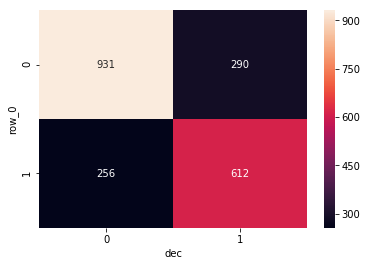

In [35]:
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.ensemble import RandomForestClassifier # for random forest classifier

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']] # taking test data inputs
test_y = test.dec   #output value of test data

model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print(metrics.accuracy_score(prediction,test_y))

from sklearn.metrics import confusion_matrix

sns.heatmap(pd.crosstab(prediction,test_y), annot=True, fmt="d")
plt.show()

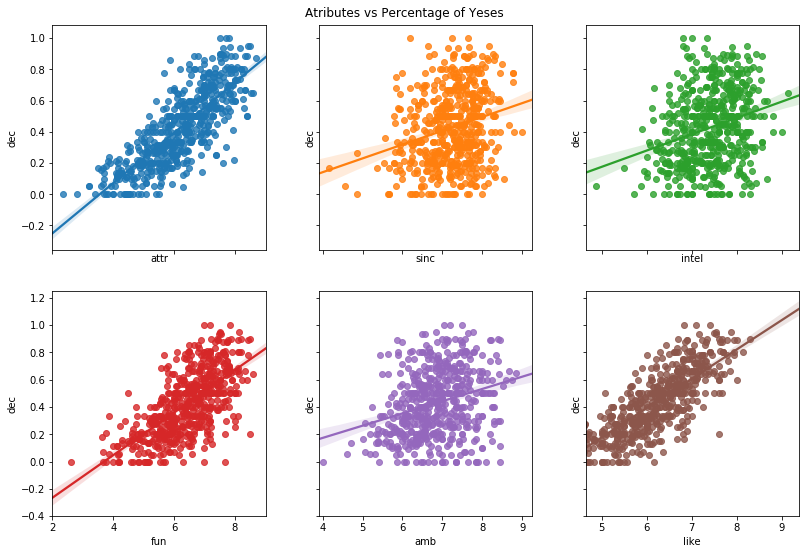

In [84]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','prob'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr , y=score_averages.dec, ax=ax1)
sns.regplot(x=score_averages.sinc , y=score_averages.dec, ax=ax2)
sns.regplot(x=score_averages.intel , y=score_averages.dec, ax=ax3)
sns.regplot(x=score_averages.fun , y=score_averages.dec, ax=ax4)
sns.regplot(x=score_averages.amb , y=score_averages.dec, ax=ax5)
sns.regplot(x=score_averages.like , y=score_averages.dec, ax=ax6)

fig.suptitle('Atributes vs Percentage of Yeses')

plt.show()

In [85]:
import statsmodels.api as sm

speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','prob'].mean().dropna()

x = score_averages.attr.reshape(-1, 1)
y = score_averages.dec.reshape(-1, 1)

x_constant = sm.add_constant(x)

ols = sm.OLS(y, x_constant)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
# print(ols_result.HC0_se)
# and covariance estimates
# print(ols_result.cov_HC0)

ols_result.summary()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     930.6
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          2.73e-120
Time:                        09:56:09   Log-Likelihood:                 277.15
No. Observations:                 551   AIC:                            -550.3
Df Residuals:                     549   BIC:                            -541.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5722      0.033    -17.176      0.000      -0.638      -0.507
x1             0.1609      0.005     30.506      0.000       0.151       0.171
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.110
Skew:                           0.039   Prob(JB):                        0.348
Kurtosis:                       3.293   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

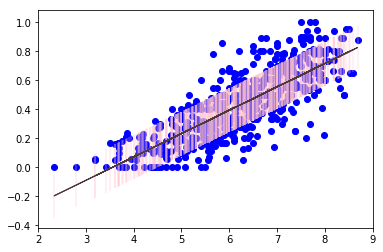

In [39]:
plt.scatter(x, y, color='blue')
plt.plot(x, ols.predict(ols_result.params), color='black', linewidth=1)

plt.errorbar(x, ols.predict(ols_result.params), yerr= .152, color='pink', alpha=0.3)
plt.show()

In [86]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','prob'].mean().dropna()

y = score_averages.dec.values.reshape(-1, 1)
x = score_averages[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','prob']]

x_constant = sm.add_constant(x)

ols = sm.OLS(y, x_constant)
ols_result = ols.fit()

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     153.5
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          5.62e-134
Time:                        09:56:54   Log-Likelihood:                 330.10
No. Observations:                 551   AIC:                            -642.2
Df Residuals:                     542   BIC:                            -603.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6342      0.074     -8.623      0.000      -0.779      -0.490
attr           0.0873      0.009      9.885      0.000       0.070       0.105
sinc          -0.0421      0.012     -3.577      0.000      -0.065      -0.019
intel          0.0049      0.016      0.309      0.758      -0.026       0.036
fun           -0.0033      0.011     -0.290      0.772      -0.026       0.019
amb           -0.0131      0.011     -1.212      0.226      -0.034       0.008
shar          -0.0039      0.011     -0.366      0.714      -0.025       0.017
like           0.1353      0.018      7.362      0.000       0.099       0.171
prob           0.0163      0.010      1.626      0.105      -0.003       0.036
==============================================================================
Omnibus:                        3.953   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                4.750
Skew:                          -0.023   Prob(JB):                       0.0930
Kurtosis:                       3.453   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
linear_formula = 'dec ~ attr+sinc+intel+fun+amb+shar+like+prob'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=score_averages).fit()

print(lm.pvalues)
print(lm.rsquared)

Intercept    7.202867e-17
attr         2.698783e-21
sinc         3.789166e-04
intel        7.575733e-01
fun          7.722632e-01
amb          2.259813e-01
shar         7.143611e-01
like         6.776083e-13
prob         1.045347e-01
dtype: float64
0.693835204657


In [89]:
from sklearn.ensemble import RandomForestRegressor

y = score_averages.dec.values.reshape(-1, 1)
x = score_averages[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','prob']]

regr_rf = RandomForestRegressor(max_depth=4, random_state=2)
regr_rf.fit(x, y)

y_rf = regr_rf.predict(x)

print(regr_rf.score(x, y))

0.760610872158


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [44]:
from sklearn.linear_model import LogisticRegression

# train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]# taking the training data input 
# train_y= train.dec# This is output of our training data
# # same we have to do for test
# test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']] # taking test data inputs
# test_y = test.dec   #output value of test data

# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474405
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 6963
Model:                          Logit   Df Residuals:                     6954
Method:                           MLE   Df Model:                            8
Date:                Fri, 08 Dec 2017   Pseudo R-squ.:                  0.3061
Time:                        08:03:53   Log-Likelihood:                -3303.3
converged:                       True   LL-Null:                       -4760.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.4339      0.023     18.585      0.000       0.388       0.480
sinc          -0.2077      0.

Percent Accuracy = 0.7660491167600172


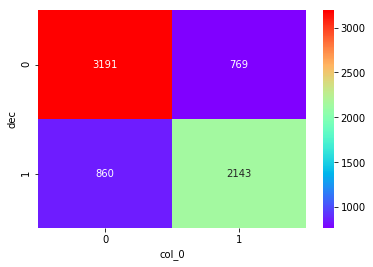

In [45]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print("Percent Accuracy = {}".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))
sns.heatmap(table, annot=True, fmt="d", cmap='rainbow')
plt.show()

This is a lasso regression to see which features retain their importance:

In [62]:
speed_dating2 = speed_dating_download.copy()
score_averages2 = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','prob'].mean().dropna()

train, test = train_test_split(score_averages2, test_size = 0.3)

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']] # taking test data inputs
test_y = test.dec   #output value of test data

# Small number of parameters.
lass = linear_model.Lasso(alpha=.018)
lassfit = lass.fit(train_X, train_y)
print('R² for the model with few features:')
print(lass.score(train_X, train_y))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.693914900056

Parameter estimates for the model with few features:
[ 0.09936464 -0.         -0.          0.          0.          0.0023659
  0.07931697  0.         -0.69588212]


In [63]:
y = score_averages.dec.values.reshape(-1, 1)
x = score_averages[['attr', 'like']]

x_constant = sm.add_constant(x)

ols = sm.OLS(y, x_constant)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
# print(ols_result.HC0_se)
# and covariance estimates
# print(ols_result.cov_HC0)

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     589.4
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          2.63e-137
Time:                        08:25:48   Log-Likelihood:                 320.21
No. Observations:                 551   AIC:                            -634.4
Df Residuals:                     548   BIC:                            -621.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8367      0.041    -20.259      0.000      -0.918      -0.756
attr           0.0928      0.009     10.788      0.000       0.076       0.110
like           0.1116      0.012      9.628      0.000       0.089       0.134
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                4.169
Skew:                          -0.018   Prob(JB):                        0.124
Kurtosis:                       3.425   Cond. No.                         64.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A Gradient Boosting Classifier using a bunch of different features to see their importance...

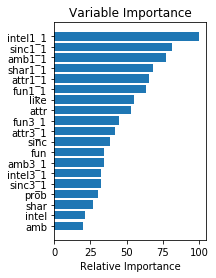

In [77]:
from sklearn import ensemble

speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 
                               'prob','attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1',
                              "attr1_1", 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 
                               'shar1_1']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
                 'attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1',"attr1_1", 'sinc1_1', 
                 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Percent Accuracy = 0.8215504631886884


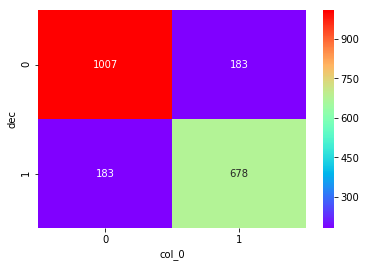

In [82]:
test_X = test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
                 'attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1',"attr1_1", 'sinc1_1', 
                 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]# taking the training data input 
test_y = test.dec# This is output of our training data


pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print("Percent Accuracy = {}".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))
sns.heatmap(table, annot=True, fmt="d", cmap='rainbow')
plt.show()

In [128]:
speed_dating2 = speed_dating_download.copy()
score_averages2 = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
                                                 'like', 'dec','prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2'].mean().dropna()

linear_formula = 'dec ~ attr+sinc+intel+fun+amb+shar+like+prob+attr3_1+sinc3_1+intel3_1+fun3_1+amb3_1+attr7_2+sinc7_2+intel7_2+fun7_2+amb7_2+shar7_2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=score_averages2).fit()

print(lm.pvalues.loc[lm.pvalues < .05])
print(lm.pvalues.loc[lm.pvalues >= .05])
print(lm.rsquared)

attr       1.211755e-07
sinc       7.889036e-03
like       3.511262e-05
attr3_1    4.270161e-03
sinc3_1    4.855243e-07
amb3_1     8.233308e-06
attr7_2    1.276845e-02
sinc7_2    3.824509e-03
amb7_2     5.008279e-08
shar7_2    1.098015e-05
dtype: float64
Intercept    0.314327
intel        0.639868
fun          0.357262
amb          0.169602
shar         0.550398
prob         0.056034
intel3_1     0.264406
fun3_1       0.127353
intel7_2     0.749603
fun7_2       0.818941
dtype: float64
0.767317231445


In [129]:
speed_dating2 = speed_dating_download.copy()
score_averages2 = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
                                                 'like', 'dec','prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2'].mean().dropna()

train, test = train_test_split(score_averages2, test_size = 0.3)

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2']] # taking test data inputs
test_y = test.dec   #output value of test data

# Small number of parameters.
lass = linear_model.Lasso(alpha=.0007)
lassfit = lass.fit(train_X, train_y)
print('R² for the model with few features:')
print(lass.score(train_X, train_y))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.761021940615

Parameter estimates for the model with few features:
[ 0.05757622 -0.0707172   0.02470309 -0.01771383  0.00322008  0.00650731
  0.15751451  0.03807203  0.18558516  0.2347107  -0.42744708 -0.
 -0.05445034 -0.00777881 -0.01254759 -0.0014504   0.00222555 -0.04496013
  0.06281336  0.17644736]


In [130]:
speed_dating2 = speed_dating_download.copy()
score_averages2 = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
                                                 'like', 'dec','prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2'].mean().dropna()

train, test = train_test_split(score_averages2, test_size = 0.3)

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2']]# taking the training data input 
train_y= train.dec.values.reshape(-1, 1) # This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','attr3_1','amb3_1',
                                                 'sinc3_1','intel3_1','fun3_1',"attr7_2", 
                                                 'sinc7_2','intel7_2', 'fun7_2', 'amb7_2',
                                                 'shar7_2']] # taking test data inputs
test_y = test.dec   #output value of test data



# y = score_averages.dec.values.reshape(-1, 1)
# x = score_averages[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','prob']]

regr_rf = RandomForestRegressor(max_depth=4, random_state=2)
regr_rf.fit(train_X, train_y)


print(regr_rf.score(train_X, train_y))

0.888403668231


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


I added this one to include race... wasn't any better...

(4836, 14)
(2073, 14)


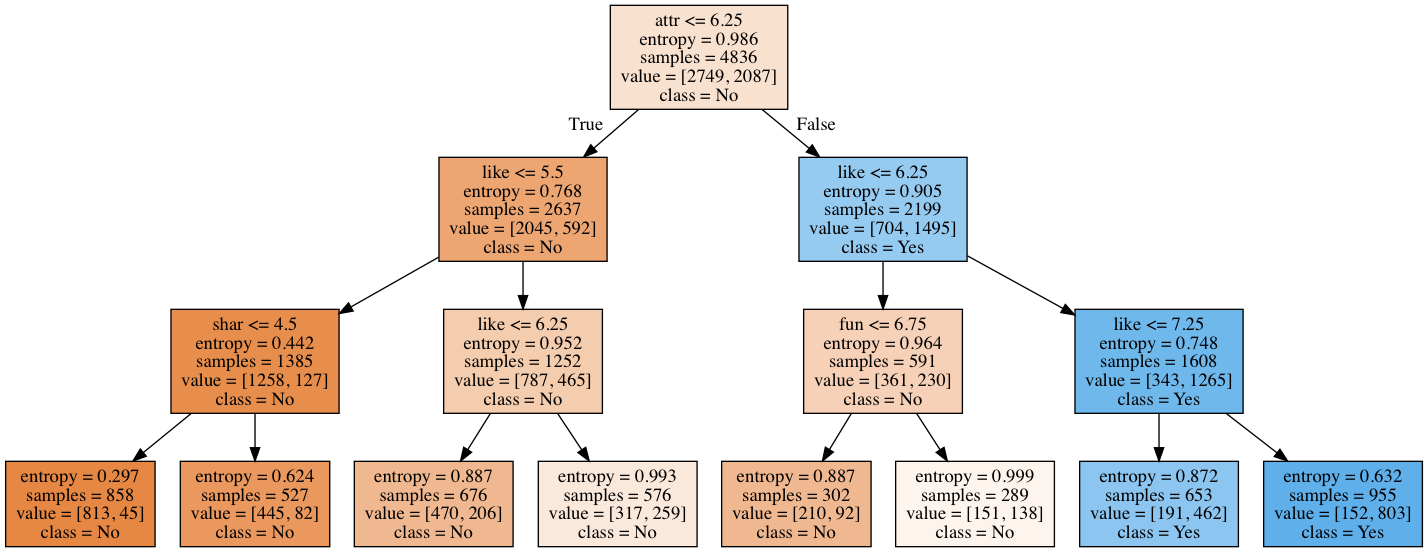

In [49]:
speed_dating2 = speed_dating[['race', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob' ]].dropna()
speed_dating2 = pd.get_dummies(speed_dating2)

from sklearn.model_selection import train_test_split # to split the data into two parts

#now split our data into train and test
train, test = train_test_split(speed_dating2, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz


train_X = train.loc[:, train.columns != 'dec']# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test.loc[:, test.columns != 'dec'] # taking test data inputs
test_y = test.dec   #output value of test data
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=3,
)
decision_tree.fit(train_X,train_y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

0.748673420164


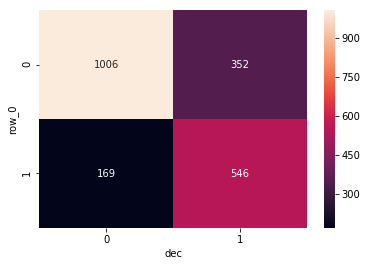

In [50]:
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix


prediction = decision_tree.predict(test_X)

print(metrics.accuracy_score(prediction,test_y))


sns.heatmap(pd.crosstab(prediction,test_y), annot=True, fmt="d")
plt.show()

In [51]:
from sklearn.model_selection import KFold

X = speed_dating2.loc[:, speed_dating2.columns != 'dec'].as_matrix()
y = speed_dating2.dec.as_matrix()

kf = KFold(n_splits=5, random_state=None, shuffle=True)
sum_of_scores = 0
for train_index, test_index in kf.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
    decision_tree.fit(train_X,train_y)
    prediction = decision_tree.predict(test_X)
    print(metrics.accuracy_score(prediction,test_y))
    sum_of_scores += metrics.accuracy_score(prediction,test_y)

print("\nMean Accuracy = {}".format(sum_of_scores/5))

0.738060781476
0.765557163531
0.743125904486
0.736613603473
0.761042722665

Mean Accuracy = 0.7488800351262901


PCA visualization... If I can end up figuring it out!

In [52]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [53]:
speed_dating3 = speed_dating[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like' ]].dropna()

X = StandardScaler().fit_transform(speed_dating3)

Xt = X.T

Cx = np.cov(Xt)

print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00014253  0.40657279  0.38723684  0.58987323  0.35969879  0.48932357
   0.66874731]
 [ 0.40657279  1.00014253  0.6663396   0.50857515  0.46393047  0.39880677
   0.52213763]
 [ 0.38723684  0.6663396   1.00014253  0.50160981  0.62941325  0.40335645
   0.50830853]
 [ 0.58987323  0.50857515  0.50160981  1.00014253  0.49509021  0.61713067
   0.6908106 ]
 [ 0.35969879  0.46393047  0.62941325  0.49509021  1.00014253  0.43511753
   0.44837136]
 [ 0.48932357  0.39880677  0.40335645  0.61713067  0.43511753  1.00014253
   0.66216275]
 [ 0.66874731  0.52213763  0.50830853  0.6908106   0.44837136  0.66216275
   1.00014253]]


In [54]:
 # Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 7).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.35913031]
 [ 0.36274716]
 [ 0.37429074]
 [ 0.40861004]
 [ 0.34777835]
 [ 0.36962336]
 [ 0.41810644]]
Eigenvalue 1: 4.116055667664511
----------------------------------------
Eigenvector 2: 
[[-0.40712309]
 [ 0.38581202]
 [ 0.51825546]
 [-0.20864572]
 [ 0.41718721]
 [-0.33093865]
 [-0.29952057]]
Eigenvalue 2: 0.9453781874494588
----------------------------------------
Eigenvector 3: 
[[-0.35451724]
 [-0.54558558]
 [-0.09385511]
 [ 0.06946933]
 [ 0.59528471]
 [ 0.44659188]
 [-0.09597362]]
Eigenvalue 3: 0.573413738279358
----------------------------------------
Eigenvector 4: 
[[-0.61780561]
 [ 0.3728106 ]
 [-0.02036801]
 [ 0.05330268]
 [-0.42956675]
 [ 0.53704839]
 [ 0.05589167]]
Eigenvalue 4: 0.48091380699601816
----------------------------------------
Eigenvector 5: 
[[-0.24892409]
 [ 0.00947023]
 [-0.1722947 ]
 [ 0.86343229]
 [-0.00815421]
 [-0.37667484]
 [-0.14420784]]
Eigenvalue 5: 0.3462904360598943
----------------------------------------
Eigenvector 6: 
[[-0.

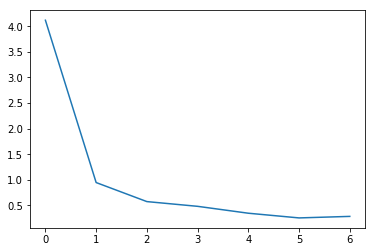

In [55]:
plt.plot(eig_val_cov)
plt.show()

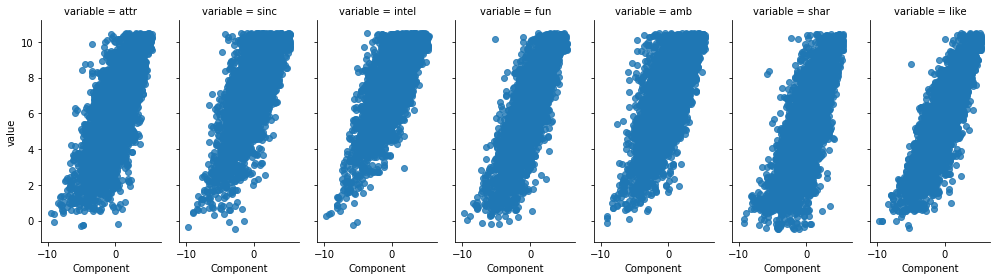

In [56]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = speed_dating3[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.58792415  0.13503478  0.08190457  0.06869218  0.04946301  0.04061824
  0.03636306]


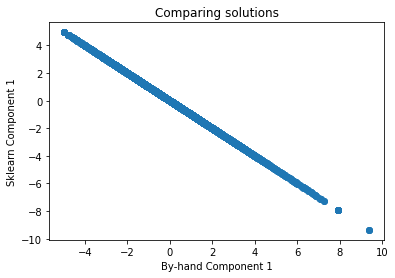

In [57]:
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

References

Fisher, R. & Iyengar, S. (2004). Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment \[Data file and code book\]. Retrieved from http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

Montoya, A. (2015). Speed Dating Experiment
What attributes influence the selection of a romantic partner?. Retrieved from https://www.kaggle.com/annavictoria/speed-dating-experiment